# Fixation of a Beneficial Mutation 

How likely is it that a beneficial mutation will become fixed in a population where it arises by mutation.

My hypothesis is that evolution isn't good enough to fix a new beneficial mutation. That random chance means that the beneficial mutation will have a non trivial chance of being lost upon on it's apparence. These odds appear even worse when the you consider just the odds of a beneficial mutation in a sperm meeting an ovum.

The main problem I have with selection model is that is assumes that there are a non-discrete number of individuals in the population. Even in very massive populations I hypothesis that when a beneficial mutation arise in *one* individual that individual has a non-trivial chance of being lost and with it, it's beneficial mutation. 

Either way, lets run some Monte Carlo simulations based on natural selection and drift working together.

**My Simulation's Assuptions:**
- The trait is a simple mendelian traits that can be either dominant, recessive or additive.
- The population size is constant (^)
- The population is under HWE (^)
- No mutation will increase or decrease the number of alleles because the chances of which is effectively 0

(^) Denote assumptions I think maybe too unrealistic to make.

**Note about the simulations**
All simulations start off with only 1 copy of the beneficial gene. I'm assuming 

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import DriftAndNaturalSelection as NS

number_of_runs = 2500

## Small Population (10% Selective Advantage, N=250)

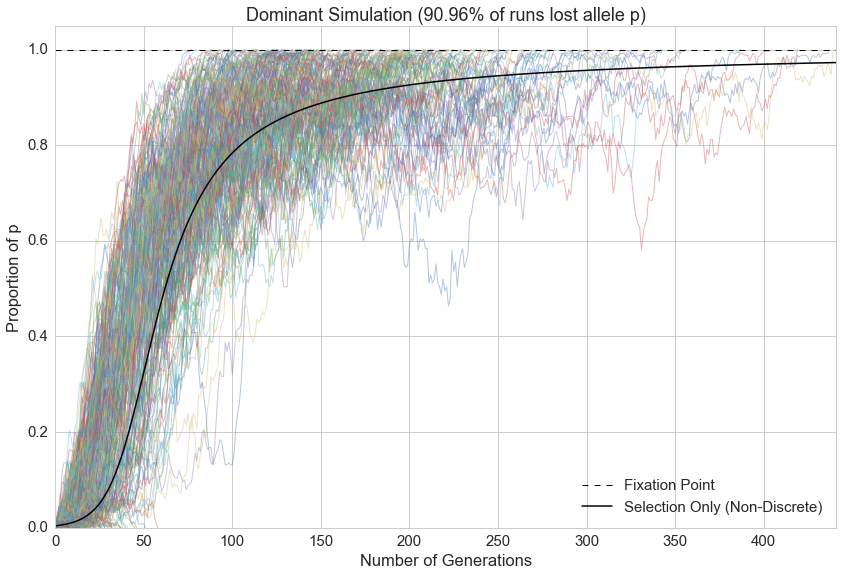

In [3]:
# Dominant Simulation
smallpop_dominant_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.DOMINANT)
number_of_generations, number_lost = smallpop_dominant_selection.run(number_of_runs=number_of_runs)

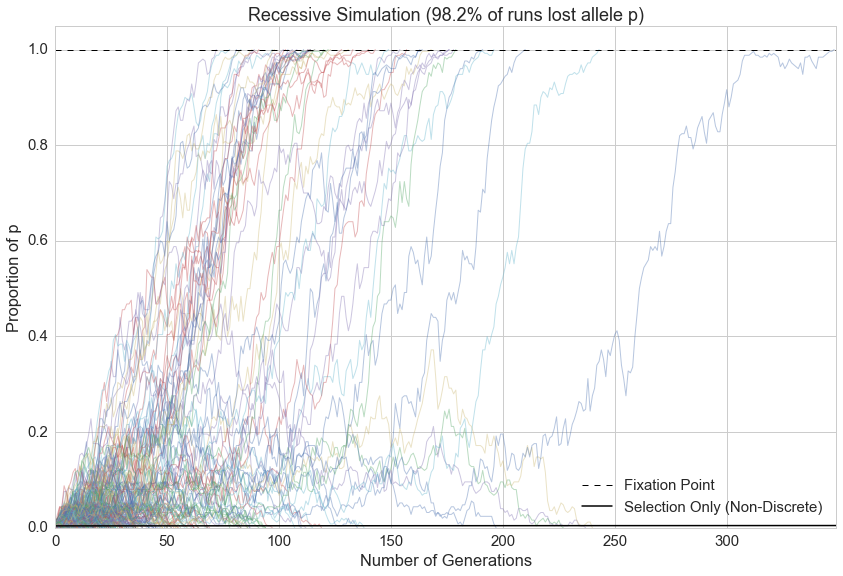

In [4]:
# Recessive Simulation
smallpop_recessive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = smallpop_recessive_selection.run(number_of_runs=number_of_runs)

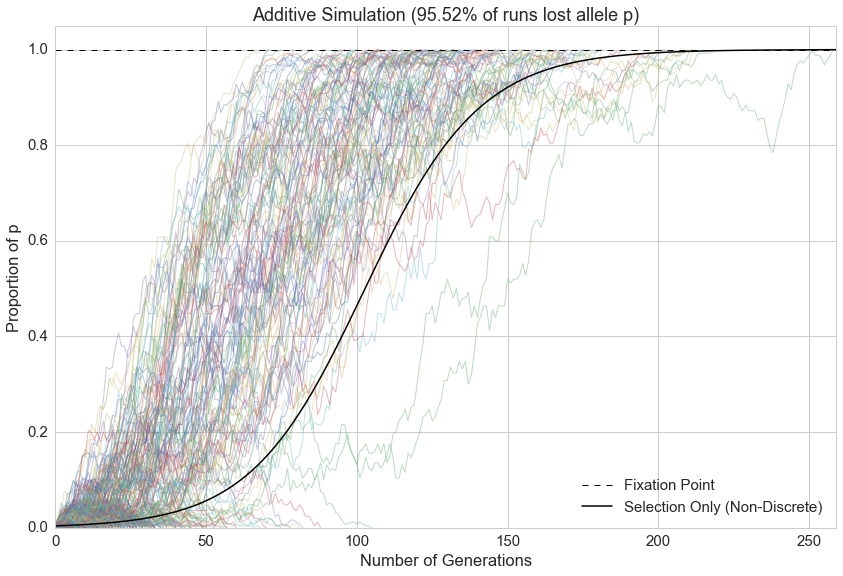

In [5]:
# Additive Simulation
smallpop_additive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.ADDITIVE)
number_of_generations, number_lost = smallpop_additive_selection.run(number_of_runs=number_of_runs)

## Large(ish) Population (10% Selective Advantage, N=6500)

6500 is the number of adult Cheetahs in South Africa where there population is most dense. Why Cheetahs? Because they're pretty cool cats ;)

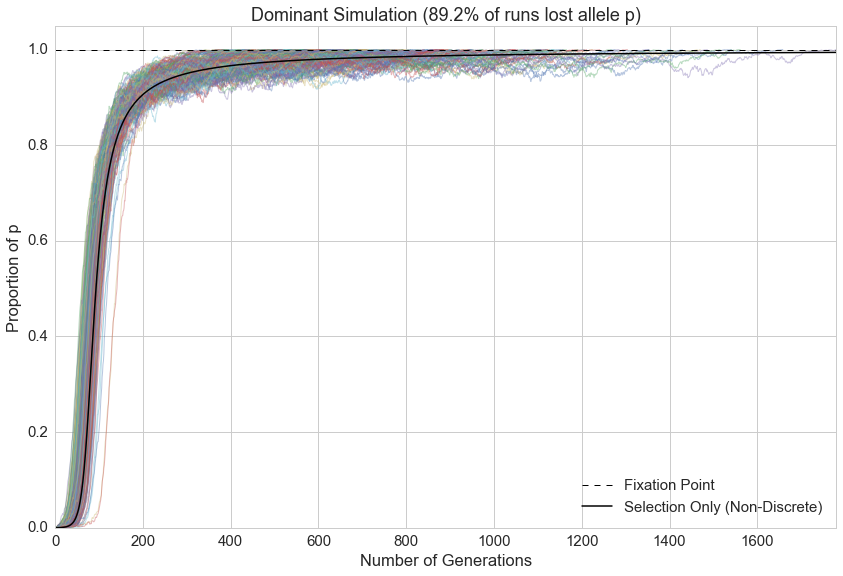

In [6]:
# Dominant Simulation
dominant_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.DOMINANT)
number_of_generations, number_lost = dominant_selection.run(number_of_runs=number_of_runs)

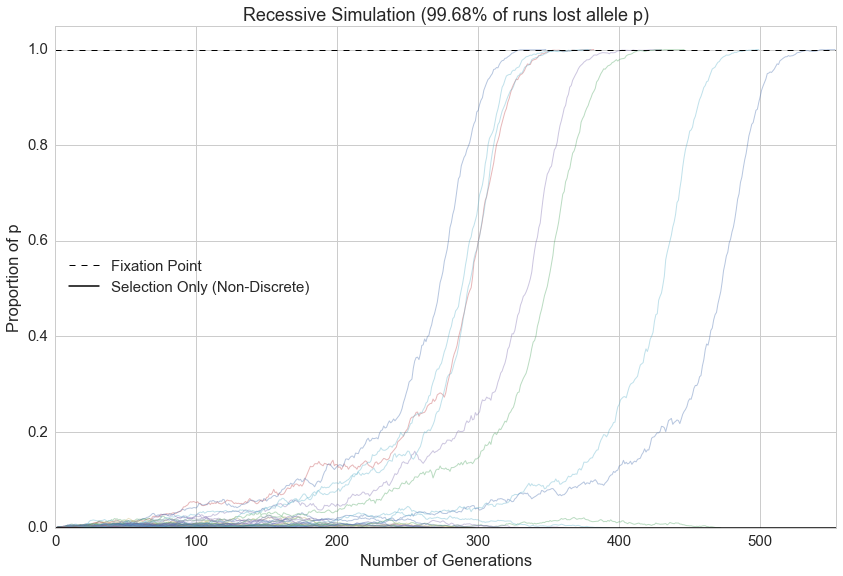

In [7]:
# Recessive Simulation
recessive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = recessive_selection.run(number_of_runs=number_of_runs)

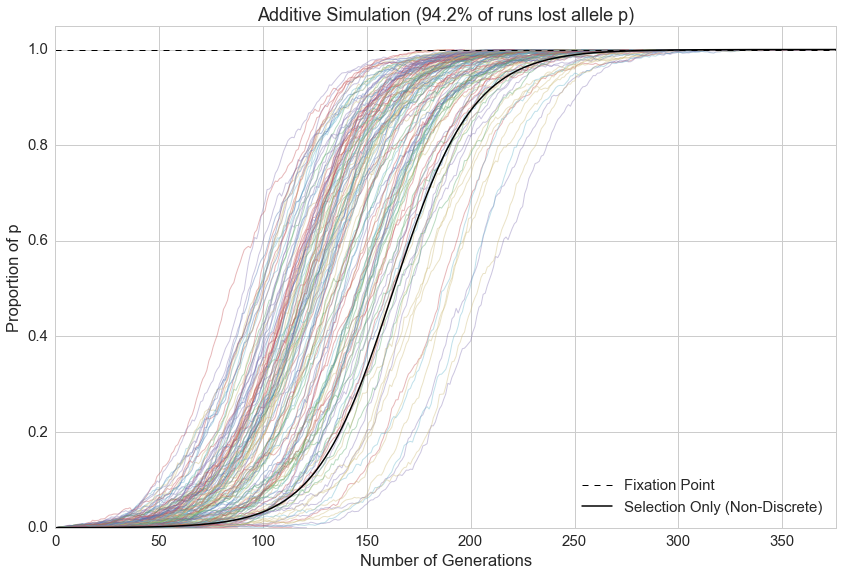

In [8]:
# Additive Simulation
additive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.ADDITIVE)
number_of_generations, number_lost = additive_selection.run(number_of_runs=number_of_runs)

## What I believe is going on

Drift is driving fixation of the beneficial allele in the wrong direction when the number of individuals with that allele is low. Especially for beneficial recessive alleles drift gets efffectively more chances to remove that allele from the population

### About the Recessive allele

All the other simulations came fairly close to the selection only non-discrete model except the recessive simulation. I believe this was because while most of the time the beneficial allele would be lost occassionally extremely rare events would push the number of individuals that would homozygous recessive safely pass where drift has the stronger effect and the more log form of the model kicked in. 

I can demonstrate this by starting off the simulation with a number of copies of allele p is high enough that the probability of the beneficial allele being lost is extremely low, for example **N<sub>p</sub>=1000**

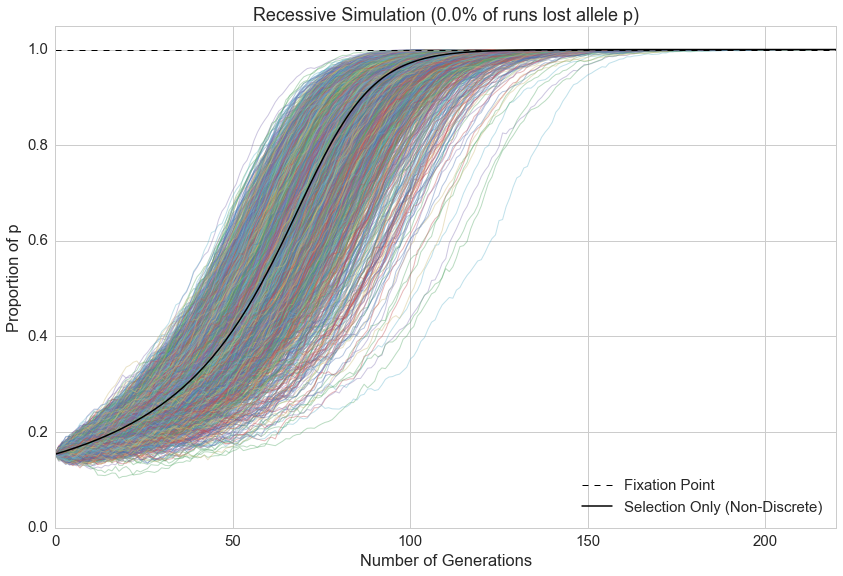

In [9]:
# Try the Cheetah simulation again except that the number of p allele in the gene pool is 650 instead of 1
n_p = 1000
recessive_selection_safe = NS.NSWithDriftSimulation(size_p=n_p, size_q=6500-n_p, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = recessive_selection_safe.run(number_of_runs=number_of_runs)

Starting from those conditions all none of the simulations resulted in lose of the beneficial allele and all the runs as a whole seems to track the selection only model well.